# Example of using different calibration matrices

In [41]:
import numpy as np
import pandas as pd
import earthscopestraintools
import importlib
from scipy.optimize import curve_fit
importlib.reload(earthscopestraintools)

from earthscopestraintools.mseed_tools import ts_from_mseed
from earthscopestraintools.gtsm_metadata import GtsmMetadata
from earthscopestraintools.timeseries import Timeseries, plot_timeseries_comparison

import dateutil
import datetime
import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )
np.set_printoptions(suppress=True)

### Load the metadata for a station and view the available strain/calibration matrices
note that CH_prelim has been renamed to CH2024, but usage of either name is supported for now

In [42]:
network = 'IV'
station = 'TSM5'
start = "2024-01-03T00:00:01"
end = "2024-01-05T23:59:59"
meta = GtsmMetadata(station=station,network=network)
meta.strain_matrices

{'lab': array([[ 0.2962963 ,  0.51851852,  0.2962963 ,  0.22222222],
        [-0.23421081,  0.3334514 ,  0.10083025, -0.20007084],
        [-0.31429352, -0.1611967 ,  0.3787722 ,  0.09671802]]),
 'ER2010': None,
 'KH2013': None,
 'CH2024': array([[-2.29756838, -1.78884499, -1.90750646, -0.23665333],
        [-0.08233948,  0.27250792,  0.36601184, -0.13119797],
        [-0.48265607, -0.38451238, -0.00899979,  0.08270539]]),
 'CH_prelim': array([[-2.29756838, -1.78884499, -1.90750646, -0.23665333],
        [-0.08233948,  0.27250792,  0.36601184, -0.13119797],
        [-0.48265607, -0.38451238, -0.00899979,  0.08270539]]),
 'EM2024': array([[-0.0000858, -0.0000686, -0.0001037,  0.0000133],
        [ 0.0000011,  0.0000162,  0.0000247, -0.0000097],
        [-0.0000206, -0.0000145, -0.0000029,  0.0000093]])}

### Download some raw strain 1hz data

IV TSM5 Loading T0 LS* from 2024-01-03T00:00:01 to 2024-01-05T23:59:59 from Earthscope DMC miniseed
    Trace 1. 2024-01-03T00:00:01.000000Z:2024-01-05T23:59:59.000000Z mapping LS3 to CH2
    Trace 2. 2024-01-03T00:00:01.000000Z:2024-01-05T23:59:59.000000Z mapping LS1 to CH0
    Trace 3. 2024-01-03T00:00:01.000000Z:2024-01-05T23:59:59.000000Z mapping LS2 to CH1
    Trace 4. 2024-01-03T00:00:01.000000Z:2024-01-05T23:59:59.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 0.25 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
IV.TSM5.T0.LS*
    | Channels: ['CH2', 'CH0', 'CH1', 'CH3']             
    | TimeRange: 2024-01-03 00:00:01 - 2024-01-05 23:59:59        | Period:           1.0s
    | Series:         raw| Units:        counts| Level:          0| Gaps:             0.0% 
    | Epochs:      259199| Good:

,CH2,CH0,CH1,CH3
time,,,,
2024-01-03 00:00:01,54161503.0,42353128,55452373,42882498
2024-01-03 00:00:02,54161503.0,42353129,55452372,42882501
2024-01-03 00:00:03,54161502.0,42353127,55452374,42882494
2024-01-03 00:00:04,54161499.0,42353128,55452375,42882491
2024-01-03 00:00:05,54161503.0,42353126,55452371,42882497
...,...,...,...,...
2024-01-05 23:59:55,54158282.0,42337826,55453776,42869462
2024-01-05 23:59:56,54158279.0,42337823,55453780,42869455
2024-01-05 23:59:57,54158283.0,42337816,55453780,42869454


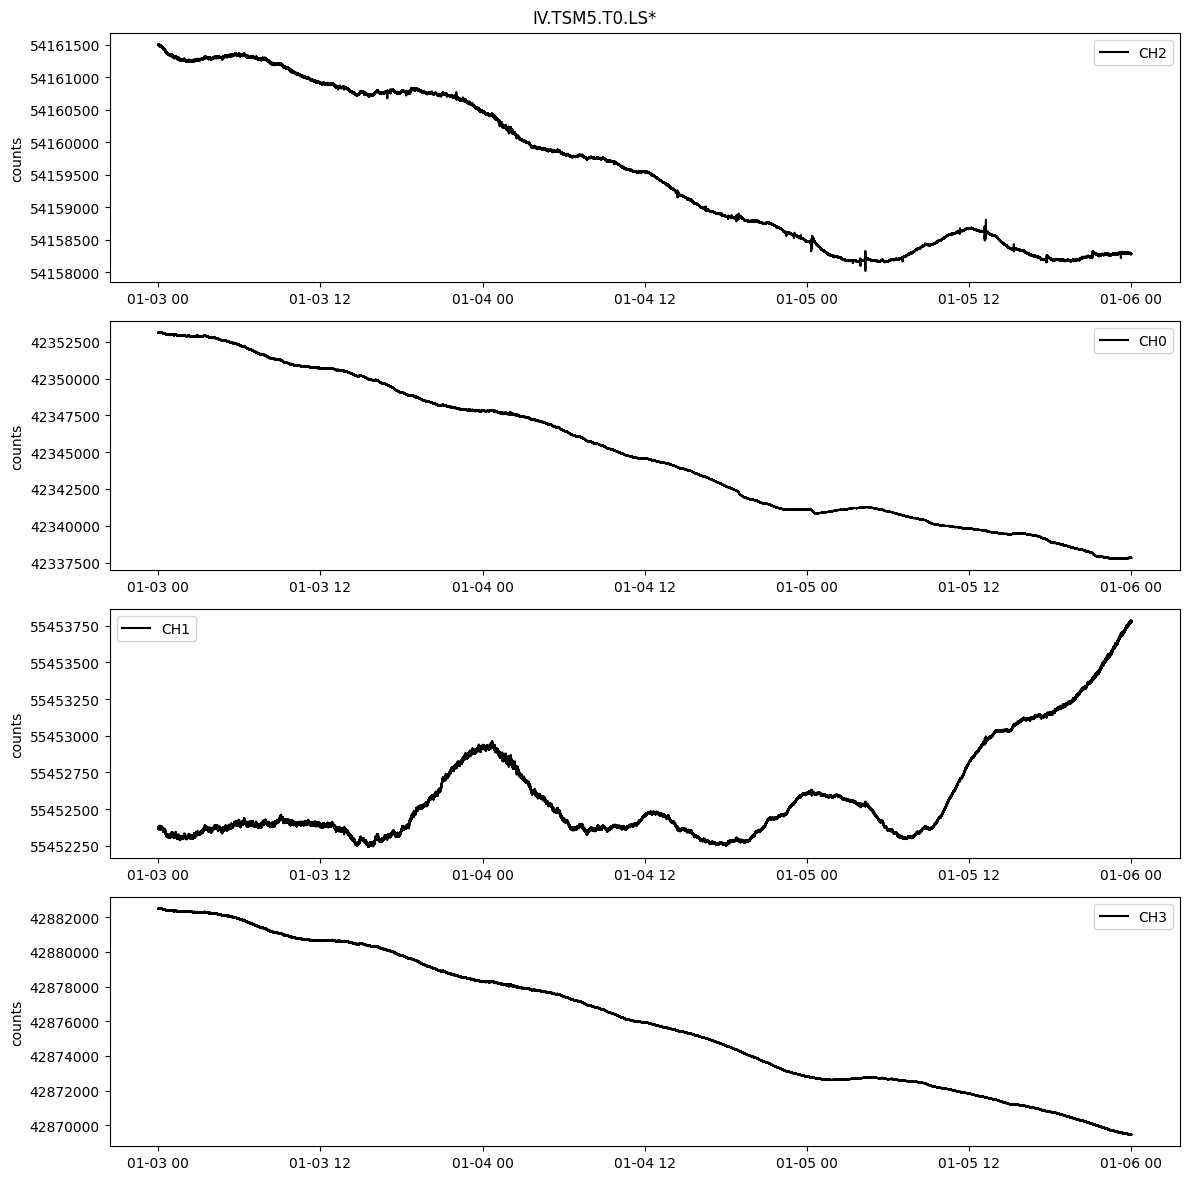

In [43]:
strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='LS*', start=start, end=end)
strain_raw.stats()
strain_raw.plot()
strain_raw.data

Decimating to 300s
Interpolating data using method=linear and limit=3600
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
IV.TSM5.T0.LS*.decimated
    | Channels: ['CH2', 'CH0', 'CH1', 'CH3']             
    | TimeRange: 2024-01-03 00:05:00 - 2024-01-05 23:55:00        | Period:           300s
    | Series:         raw| Units:        counts| Level:          1| Gaps:             0.0% 
    | Epochs:         863| Good:          863.0| Missing:      0.0| Interpolated:      0.0
    | Samples:       3452| Good:           3452| Missing:        0| Interpolated:        0


                            CH2         CH0         CH1         CH3
time                                                               
2024-01-03 00:05:00  54161488.0  42353112.0  55452372.0  42882488.0
2024-01-03 00:10:00  54161486.0  42353113.0  55452372.0  42882486.0
2024-01-03 00:15:00  54161479.0  42353115.0  55452373.0  42882482.0
2024-01-03 00:20:00  54161473.0  42353113.0  55452374.0  42882482.0
2024-01-03 00:25:00  54161448.0  42353083.0  55452361.0  42882461.0
...                         ...         ...         ...         ...
2024-01-05 23:35:00  54158292.0  42337773.0  55453715.0  42869528.0
2024-01-05 23:40:00  54158294.0  42337788.0  55453731.0  42869521.0
2024-01-05 23:45:00  54158297.0  42337804.0  55453745.0  42869513.0
2024-01-05 23:50:00  54158293.0  42337802.0  55453753.0  42869495.0
2024-01-05 23:55:00  54158291.0  42337808.0  55453763.0  42869481.0

[863 rows x 4 columns]


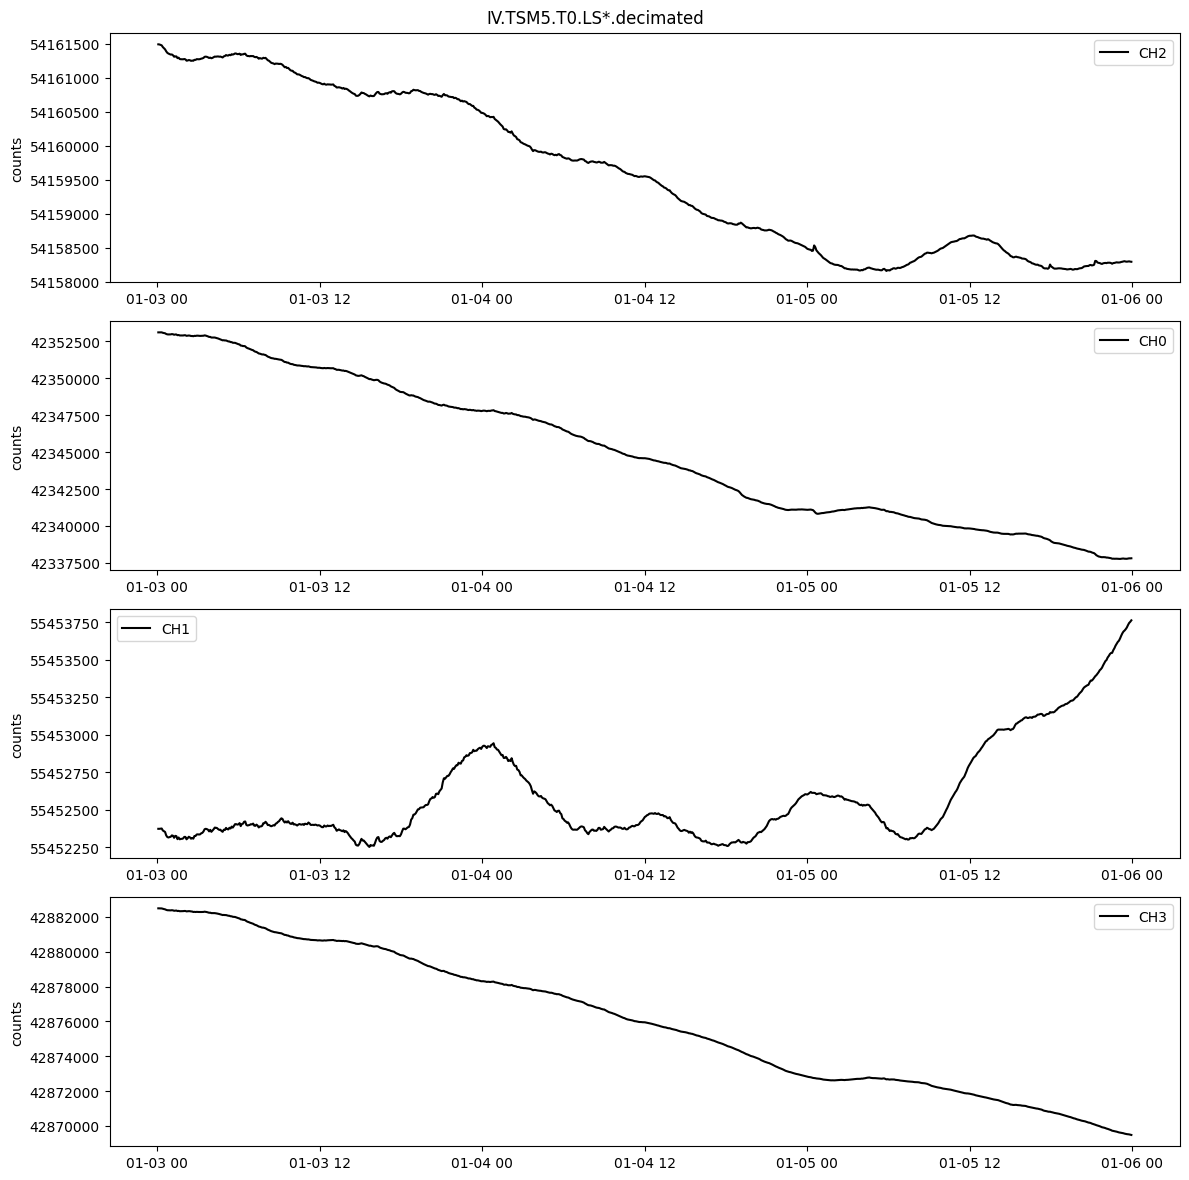

In [44]:
# decimate to 5 min data
decimated_counts = strain_raw.decimate_1s_to_300s()
print(decimated_counts.data)
decimated_counts.stats()
decimated_counts.plot()

### Apply the different available calibrations

Converting raw counts to microstrain
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


Applying lab matrix:
 [[ 0.2962963   0.51851852  0.2962963   0.22222222]
 [-0.23421081  0.3334514   0.10083025 -0.20007084]
 [-0.31429352 -0.1611967   0.3787722   0.09671802]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


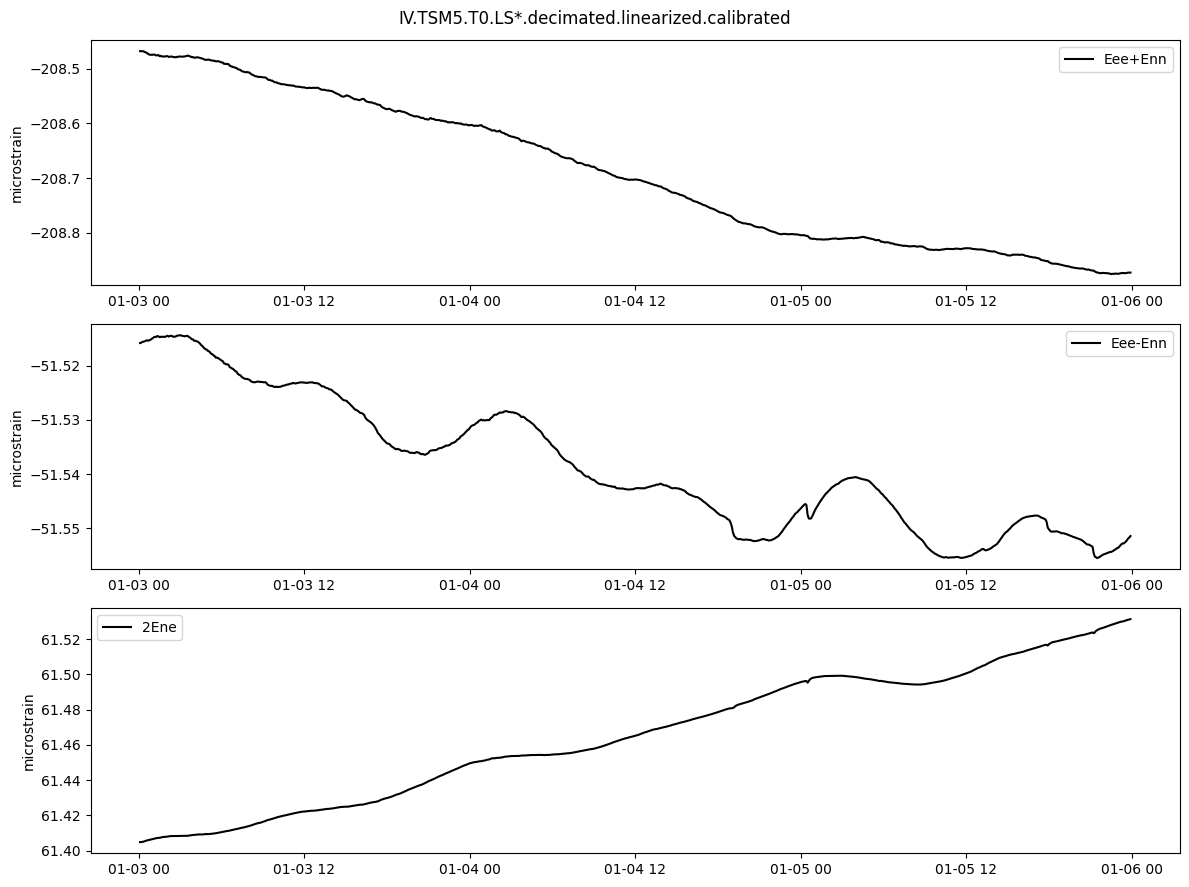

In [45]:
#linearize to microstrain and apply the lab calibration
lab = decimated_counts.linearize(reference_strains=meta.reference_strains, gap=meta.gap).apply_calibration_matrix(calibration_matrix=meta.strain_matrices['lab'],calibration_matrix_name='lab')
lab.plot()

Converting raw counts to microstrain
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying CH2024 matrix:
 [[-2.29756838 -1.78884499 -1.90750646 -0.23665333]
 [-0.08233948  0.27250792  0.36601184 -0.13119797]
 [-0.48265607 -0.38451238 -0.00899979  0.08270539]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


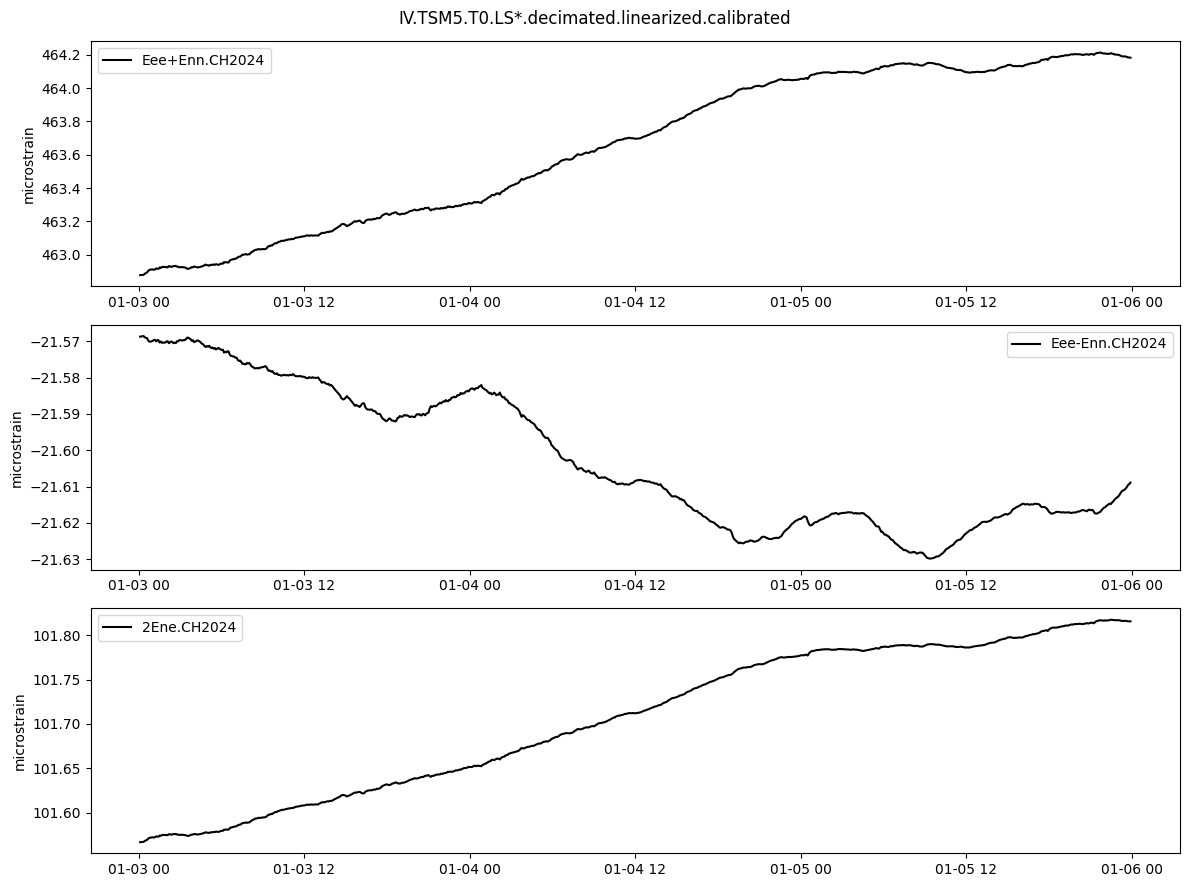

In [46]:
#linearize to microstrain and apply the CH2024 calibration
CH = decimated_counts.linearize(reference_strains=meta.reference_strains, gap=meta.gap).apply_calibration_matrix(calibration_matrix=meta.strain_matrices['CH_prelim'],calibration_matrix_name='CH2024')
CH.plot()

Applying EM2024 matrix:
 [[-0.0000858 -0.0000686 -0.0001037  0.0000133]
 [ 0.0000011  0.0000162  0.0000247 -0.0000097]
 [-0.0000206 -0.0000145 -0.0000029  0.0000093]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


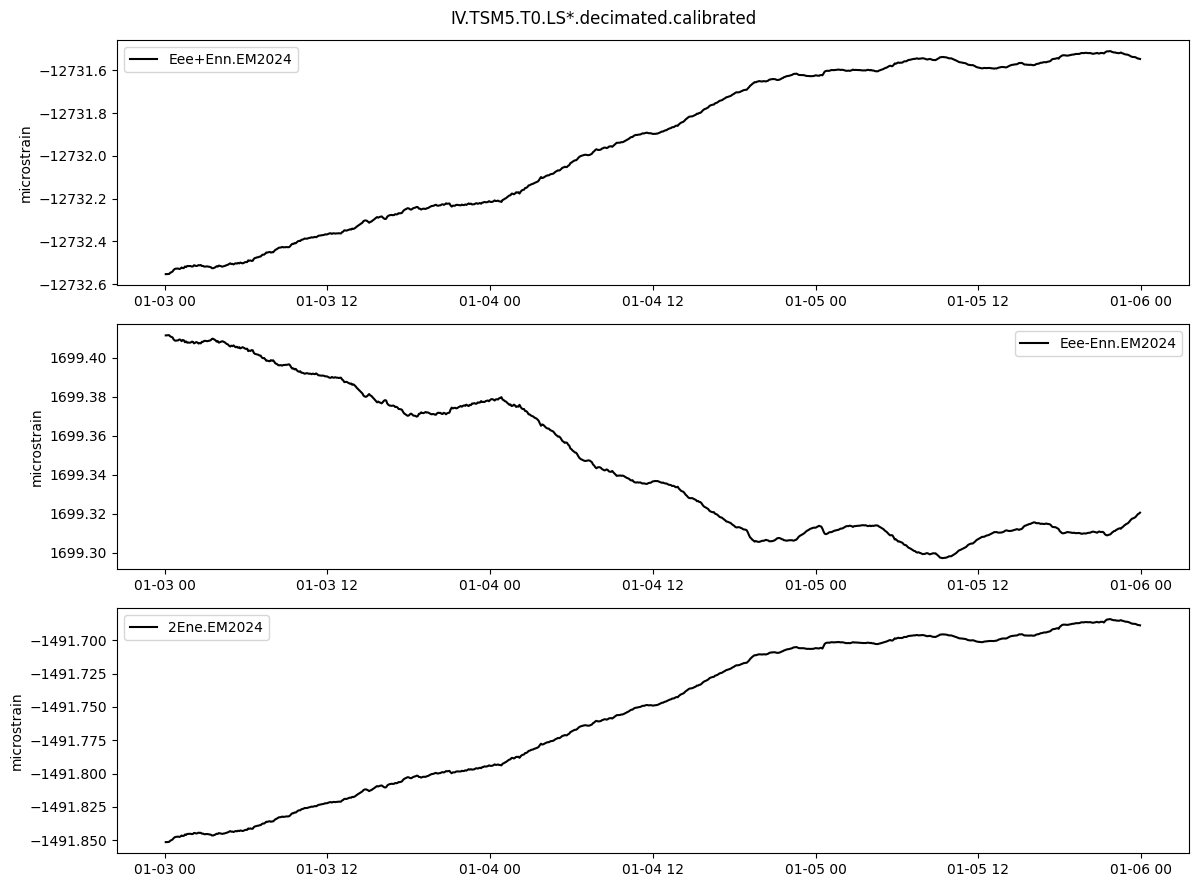

In [47]:
#apply the EM2024 calibration prior to any linearization
EM = decimated_counts.apply_calibration_matrix(calibration_matrix=meta.strain_matrices['EM2024'],calibration_matrix_name='EM2024')
EM.plot()

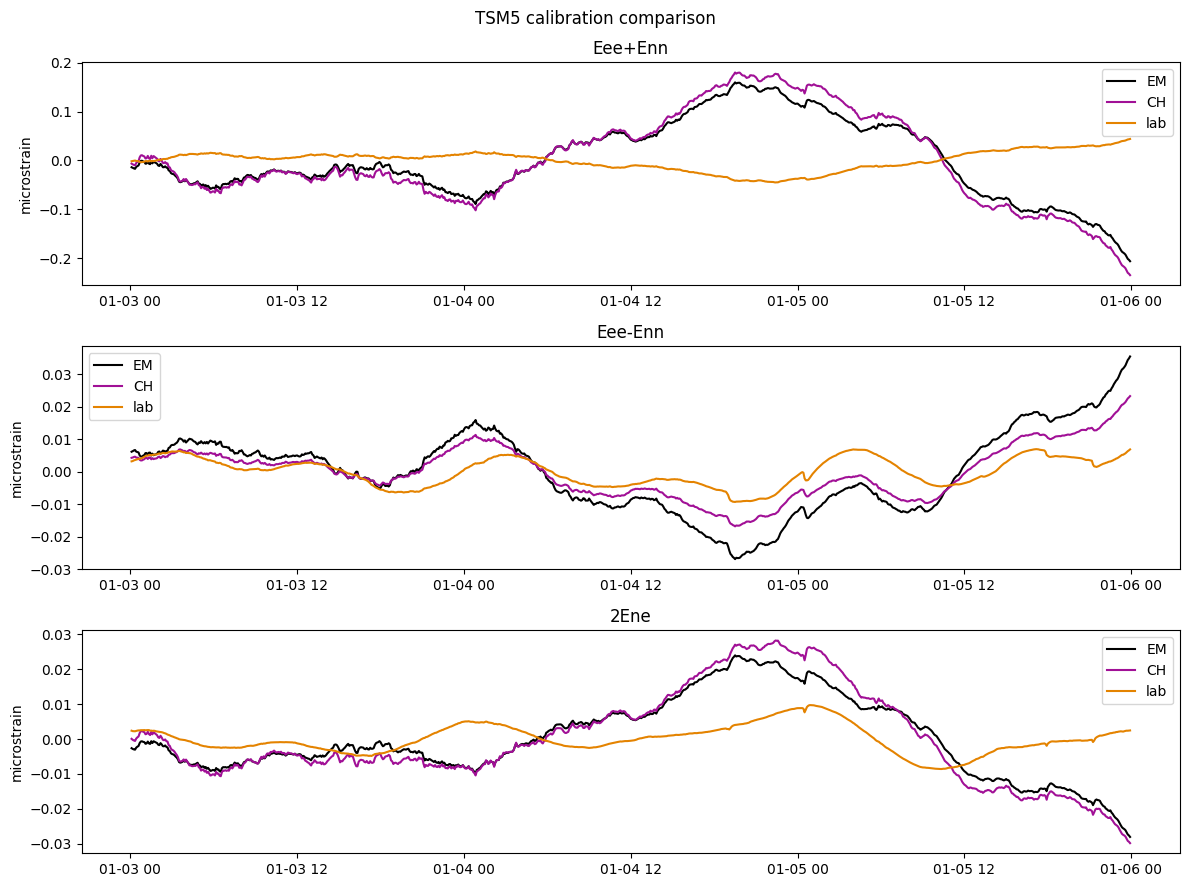

In [48]:
#make a comparison plot of the different calibrations
plot_timeseries_comparison(timeseries=[EM, CH, lab], 
                           names = ["EM","CH", "lab"], 
                           zero=True, 
                           detrend='linear', 
                           title=f'{station} calibration comparison')